In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from logreg import LogisticRegressionIRLS as LGRIRLS
from logreg import LogisticRegressionNewtonRaphson as LGRNR
from sklearn.linear_model import LogisticRegression

model_1 = LGRNR()
model_2 = LGRIRLS()
model_sklearn = LogisticRegression()

model_1.fit(X_train_scaled, y_train)
model_2.fit(X_train_scaled, y_train)
model_sklearn.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


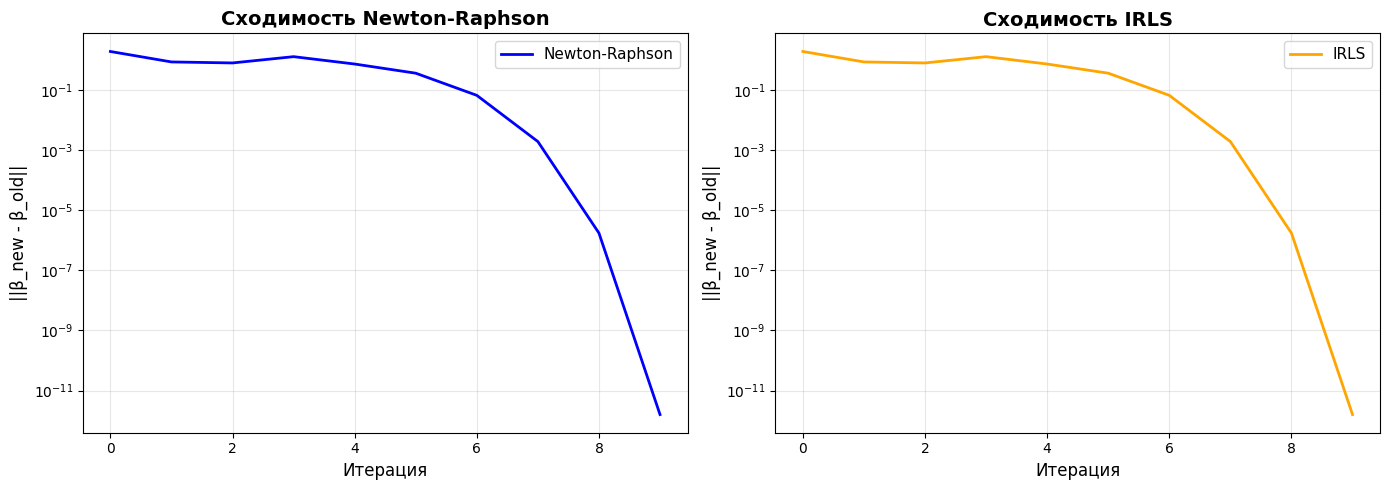

In [4]:
from utils import plot_differences

plot_differences(model_1.history, model_2.history)

In [6]:
pred_1 = model_1.predict(X_test_scaled)
pred_2 = model_2.predict(X_test_scaled)
pred_sklearn = model_sklearn.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rows = [
    ("MODEL 1", pred_1),
    ("MODEL 2", pred_2),
    ("SKLEARN", pred_sklearn),
]

# ширины колонок
w_name = 10
w_num = 10

print(
    f"{'MODEL':<{w_name}}{'Accuracy':>{w_num}}{'Recall':>{w_num}}{'Precision':>{w_num}}{'F1':>{w_num}}"
)
for name, pred in rows:
    acc = accuracy_score(y_test, pred)
    rec = recall_score(y_test, pred)
    pre = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print(
        f"{name:<{w_name}}{acc:>{w_num}.3f}{rec:>{w_num}.3f}{pre:>{w_num}.3f}{f1:>{w_num}.3f}"
    )


MODEL       Accuracy    Recall Precision        F1
MODEL 1        0.974     0.986     0.972     0.979
MODEL 2        0.974     0.986     0.972     0.979
SKLEARN        0.974     0.986     0.972     0.979
